In [8]:
# !pip install requests

In [9]:
import datetime
import requests

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [12]:
coindeskURL = 'https://api.coindesk.com/v1/bpi/historical/close.json?'

start = datetime.date(2017, 1, 1)
end = datetime.date(2020, 7, 2)

url = f'{coindeskURL}start={start:%Y-%m-%d}&end={end:%Y-%m-%d}'

result = requests.get(url)
result.content

b'{"bpi":{"2017-01-01":997.6888,"2017-01-02":1018.05,"2017-01-03":1030.8175,"2017-01-04":1129.87,"2017-01-05":1005.815,"2017-01-06":895.67,"2017-01-07":905.17,"2017-01-08":913.5238,"2017-01-09":899.35,"2017-01-10":904.7925,"2017-01-11":775.9813,"2017-01-12":802.8288,"2017-01-13":826.1213,"2017-01-14":818.6388,"2017-01-15":822.4225,"2017-01-16":830.2638,"2017-01-17":904.4538,"2017-01-18":884.2513,"2017-01-19":898.0213,"2017-01-20":891.6238,"2017-01-21":920.0113,"2017-01-22":925.3313,"2017-01-23":912.6875,"2017-01-24":885.6475,"2017-01-25":894.11,"2017-01-26":915.1,"2017-01-27":918.5625,"2017-01-28":920.28,"2017-01-29":914.0438,"2017-01-30":920.2413,"2017-01-31":967.6675,"2017-02-01":987.3463,"2017-02-02":1007.795,"2017-02-03":1018.1113,"2017-02-04":1033.6525,"2017-02-05":1013.9938,"2017-02-06":1024.6125,"2017-02-07":1052.5388,"2017-02-08":1054.3438,"2017-02-09":988.9475,"2017-02-10":993.0788,"2017-02-11":1010.0025,"2017-02-12":999.5125,"2017-02-13":996.8575,"2017-02-14":1009.2513,"2017-

In [15]:
pd.read_json(result.content).head(10)

,bpi,disclaimer,time
2017-01-01,997.6888,This data was produced from the CoinDesk Bitco...,NaN
2017-01-02,1018.0500,This data was produced from the CoinDesk Bitco...,NaN
2017-01-03,1030.8175,This data was produced from the CoinDesk Bitco...,NaN
2017-01-04,1129.8700,This data was produced from the CoinDesk Bitco...,NaN
2017-01-05,1005.8150,This data was produced from the CoinDesk Bitco...,NaN
2017-01-06,895.6700,This data was produced from the CoinDesk Bitco...,NaN
2017-01-07,905.1700,This data was produced from the CoinDesk Bitco...,NaN
2017-01-08,913.5238,This data was produced from the CoinDesk Bitco...,NaN
2017-01-09,899.3500,This data was produced from the CoinDesk Bitco...,NaN
2017-01-10,904.7925,This data was produced from the CoinDesk Bitco...,NaN


In [16]:
#
data = pd.read_json(result.content).iloc[:-2, :1]
data.index.name = 'date'
data.index = pd.to_datetime(data.index)
data.head(10)

## Note: data is at daily level

,bpi
date,
2017-01-01,997.6888
2017-01-02,1018.0500
2017-01-03,1030.8175
2017-01-04,1129.8700
2017-01-05,1005.8150
2017-01-06,895.6700
2017-01-07,905.1700
2017-01-08,913.5238
2017-01-09,899.3500


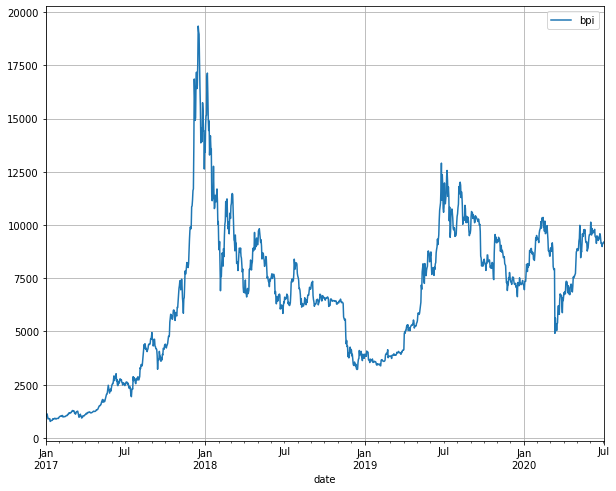

In [19]:
## Plot
data.plot(grid=True);

### Resample
`D` - Calendar Day
`B` - Business Day
`W` - Weekly
`M` - Monthly
`Q` - Quarterly
`A` - Year end
`H` - Hours
`T` - Minutes
`S` - Seconds

                     bpi
date                    
2017-03-31   1034.169242
2017-06-30   1919.658520
2017-09-30   3506.611449
2017-12-31   9413.347972
2018-03-31  10468.423818
2018-06-30   7747.165877
2018-09-30   6798.307918
2018-12-31   5169.904503
2019-03-31   3781.639959
2019-06-30   7295.205002
2019-09-30  10369.583753
2019-12-31   7994.267917
2020-03-31   8273.003262
2020-06-30   8649.343719
2020-09-30   9176.912500


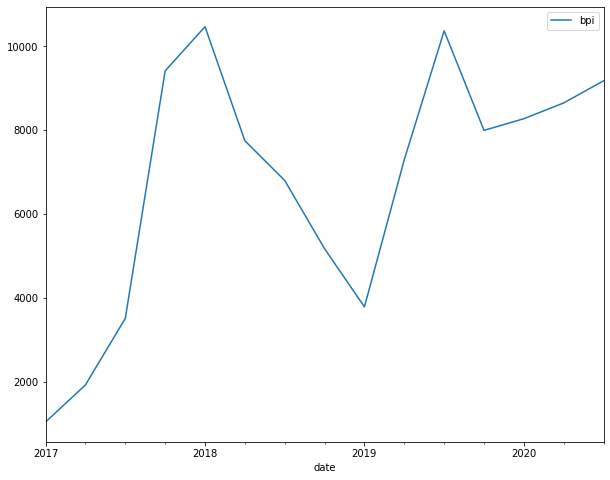

In [22]:
##
print(data.resample('Q').mean())

## plot
display(data.resample('Q').mean().plot())

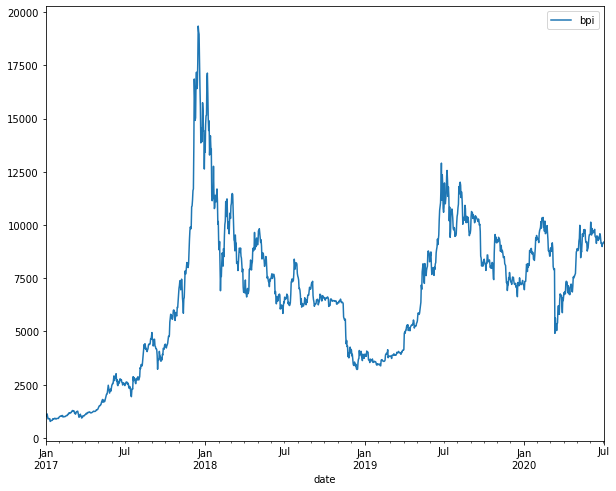

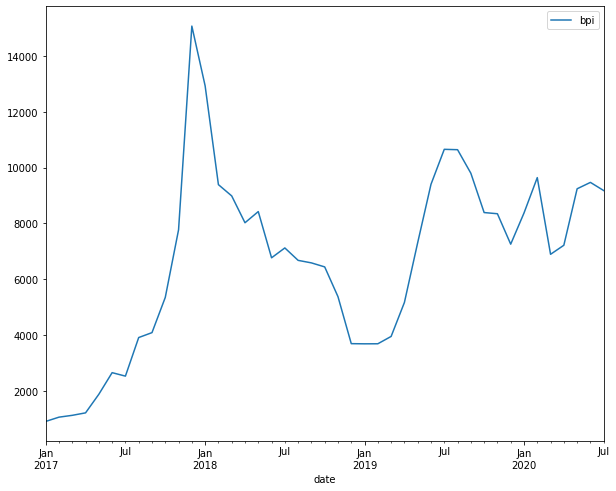

In [23]:
##
data.plot()
data.resample('M').mean().plot()